https://www.datamanim.com/dataset/03_dataq/diamondQuestion.html

# Question 1
carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

In [4]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


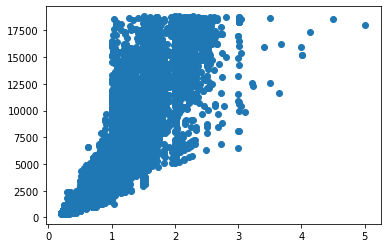

In [7]:
import matplotlib.pyplot as plt
plt.scatterterter(data=data, x='carat', y='price')

# Question 2
carat과 price사이의 상관계수와 상관계수의 p-value값은?

In [11]:
corr=data.corr().iloc[0,3]
corr

0.9215913011934687

In [14]:
from scipy import stats
corr, pv=stats.pearsonr(data.carat, data.price)

In [15]:
corr

0.9215913011935015

In [17]:
pv

0.0

# Question 3
Diamond의 평균가격은 3932로 알려져있다. ‘H’ color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오